# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
!pwd

/c/Users/15125/Desktop/UT-MCB-DATA-PT-11-2019-U-C/Homework/05-Python-APIs/Instructions/starter_code


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#set seed
random.seed(210)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [5]:
(lats[0], lngs[0])

(72.93973910245407, 168.09776769027894)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# url = f"http://www.api.openweathermap.org/data/2.5/weather?q={city_name}&APPID={api_key}"

In [46]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [7]:
def get_weather_json(city, api_key):
    
    url = "http://api.openweathermap.org/data/2.5/weather"
    r = requests.get(url, params={
        "appid": api_key,
        "q": city
    })
    if r.status_code == 200:
        r_json = r.json()
        return r_json
    else:
        return None
    

In [9]:
store_responses={}
for city_name in cities:
    #Here we are getting the information for the scpecific city
    response = get_weather_json(city_name, api_key)
    store_responses[city_name]=response
    
    
    

In [45]:
for key in store_responses:
    print(key, '->',store_responses[key]['main'])

pevek -> {'temp': 252.21, 'feels_like': 247.62, 'temp_min': 252.21, 'temp_max': 252.21, 'pressure': 1026, 'humidity': 64, 'sea_level': 1026, 'grnd_level': 1025}
bathsheba -> {'temp': 302.15, 'feels_like': 301.28, 'temp_min': 302.15, 'temp_max': 302.15, 'pressure': 1014, 'humidity': 62}
albany -> {'temp': 276.25, 'feels_like': 272.24, 'temp_min': 274.26, 'temp_max': 279.26, 'pressure': 1001, 'humidity': 86}
ushuaia -> {'temp': 287.46, 'feels_like': 283.68, 'temp_min': 287.15, 'temp_max': 288.15, 'pressure': 1004, 'humidity': 38}
tilichiki -> {'temp': 254.85, 'feels_like': 249.4, 'temp_min': 254.85, 'temp_max': 254.85, 'pressure': 1024, 'humidity': 69, 'sea_level': 1024, 'grnd_level': 1009}
alice springs -> {'temp': 293.15, 'feels_like': 292.21, 'temp_min': 293.15, 'temp_max': 293.15, 'pressure': 1015, 'humidity': 77}
busselton -> {'temp': 286.45, 'feels_like': 281.19, 'temp_min': 284.26, 'temp_max': 287.59, 'pressure': 1008, 'humidity': 41}
port alfred -> {'temp': 294.82, 'feels_like': 

TypeError: 'NoneType' object is not subscriptable

In [42]:
pd.DataFrame(store_responses)

,pevek,bathsheba,albany,ushuaia,tilichiki,alice springs,busselton,port alfred,mataura,butaritari,...,dali,azimur,zachagansk,kawalu,oranjestad,canar,ranong,quesnel,tecoanapa,saint george
coord,"{'lon': 170.27, 'lat': 69.7}","{'lon': -59.52, 'lat': 13.22}","{'lon': -73.75, 'lat': 42.65}","{'lon': -68.31, 'lat': -54.81}","{'lon': 166.1, 'lat': 60.47}","{'lon': 133.88, 'lat': -23.7}","{'lon': 115.35, 'lat': -33.64}","{'lon': 26.89, 'lat': -33.59}","{'lon': 168.86, 'lat': -46.19}","{'lon': 172.79, 'lat': 3.07}",...,"{'lon': 109.94, 'lat': 34.79}",None,None,"{'lon': 108.21, 'lat': -7.38}","{'lon': -70.03, 'lat': 12.52}","{'lon': -78.93, 'lat': -2.55}","{'lon': 98.62, 'lat': 9.96}","{'lon': -122.49, 'lat': 52.98}","{'lon': -99.26, 'lat': 16.99}","{'lon': 22.34, 'lat': 39.45}"
weather,"[{'id': 800, 'main': 'Clear', 'description': '...","[{'id': 521, 'main': 'Rain', 'description': 's...","[{'id': 300, 'main': 'Drizzle', 'description':...","[{'id': 802, 'main': 'Clouds', 'description': ...","[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 803, 'main': 'Clouds', 'description': ...","[{'id': 800, 'main': 'Clear', 'description': '...","[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 804, 'main': 'Clouds', 'description': ...","[{'id': 802, 'main': 'Clouds', 'description': ...",...,"[{'id': 601, 'main': 'Snow', 'description': 's...",None,None,"[{'id': 802, 'main': 'Clouds', 'description': ...","[{'id': 803, 'main': 'Clouds', 'description': ...","[{'id': 803, 'main': 'Clouds', 'description': ...","[{'id': 802, 'main': 'Clouds', 'description': ...","[{'id': 800, 'main': 'Clear', 'description': '...","[{'id': 802, 'main': 'Clouds', 'description': ...","[{'id': 803, 'main': 'Clouds', 'description': ..."
base,model,stations,stations,stations,model,stations,stations,stations,stations,model,...,model,None,None,model,stations,stations,model,stations,stations,stations
main,"{'temp': 252.21, 'feels_like': 247.62, 'temp_m...","{'temp': 302.15, 'feels_like': 301.28, 'temp_m...","{'temp': 276.25, 'feels_like': 272.24, 'temp_m...","{'temp': 287.46, 'feels_like': 283.68, 'temp_m...","{'temp': 254.85, 'feels_like': 249.4, 'temp_mi...","{'temp': 293.15, 'feels_like': 292.21, 'temp_m...","{'temp': 286.45, 'feels_like': 281.19, 'temp_m...","{'temp': 294.82, 'feels_like': 298.86, 'temp_m...","{'temp': 284.26, 'feels_like': 281.86, 'temp_m...","{'temp': 302.38, 'feels_like': 304.06, 'temp_m...",...,"{'temp': 274.54, 'feels_like': 265.42, 'temp_m...",None,None,"{'temp': 294.45, 'feels_like': 296.93, 'temp_m...","{'temp': 303.15, 'feels_like': 303.46, 'temp_m...","{'temp': 292.15, 'feels_like': 287.33, 'temp_m...","{'temp': 297.87, 'feels_like': 300.62, 'temp_m...","{'temp': 274.15, 'feels_like': 268.47, 'temp_m...","{'temp': 303.15, 'feels_like': 306.89, 'temp_m...","{'temp': 276.78, 'feels_like': 273.74, 'temp_m..."
wind,"{'speed': 1.19, 'deg': 147}","{'speed': 7.2, 'deg': 80}","{'speed': 3.1, 'deg': 350}","{'speed': 2.6, 'deg': 230}","{'speed': 2.54, 'deg': 4}","{'speed': 4.1, 'deg': 160}","{'speed': 4.75, 'deg': 69}","{'speed': 0.45, 'deg': 208, 'gust': 2.24}","{'speed': 3.13, 'deg': 314, 'gust': 5.36}","{'speed': 6.76, 'deg': 109}",...,"{'speed': 10.3, 'deg': 66}",None,None,"{'speed': 1.23, 'deg': 308}","{'speed': 6.2, 'deg': 90}","{'speed': 8.2, 'deg': 230}","{'speed': 2.8, 'deg': 84}","{'speed': 4.1, 'deg': 160}","{'speed': 2.1, 'deg': 210}","{'speed': 0.64, 'deg': 291}"
clouds,{'all': 0},{'all': 40},{'all': 90},{'all': 40},{'all': 98},{'all': 78},{'all': 0},{'all': 100},{'all': 98},{'all': 38},...,{'all': 100},None,None,{'all': 45},{'all': 75},{'all': 75},{'all': 37},{'all': 1},{'all': 40},{'all': 75}
dt,1578169859,1578169859,1578169604,1578169309,1578169859,1578169860,1578169846,1578169597,1578169602,1578169860,...,1578169924,None,None,1578169925,1578169917,1578169925,1578169925,1578169925,1578169925,1578169925
sys,"{'country': 'RU', 'sunrise': 0, 'sunset': 0}","{'type': 1, 'id': 8772, 'country': 'BB', 'sunr...","{'type': 1, 'id': 

In [ ]:
# Dependencies
import pprint
import json
import requests
from config import api_key
import pandas as pd
def get_weather_json(city, api_key):
    
    url = "http://api.openweathermap.org/data/2.5/weather"
    r = requests.get(url, params={
        "appid": api_key,
        "q": city
    })
    if r.status_code == 200:
        r_json = r.json()
        return r_json
    else:
        return None
in_cities = ["austin", "houston", "trontsrad;", "dallas", "fort worth"]
out_cities = []
for in_city in in_cities:
    out_city = get_weather_json(in_city, api_key)
    if out_city:
        out_cities.append(out_city)
import pprint
import json
import requests
from config import api_key
def get_weather_json(city, api_key):
    
    url = "http://api.openweathermap.org/data/2.5/weather"
    r = requests.get(url, params={
        "appid": api_key,
        "q": city
    })
    if r.status_code == 200:
        r_json = r.json()
        return r_json
    else:
        return None
in_cities = ["austin", "houston", "trontsrad;", "dallas", "fort worth"]
out_cities = []
for in_city in in_cities:
    out_city = get_weather_json(in_city, api_key)
    if out_city:
        out_cities.append(out_city)
pd.DataFrame(out_cities)
pprint.pprint(out_cities, indent=4)
cleaned_out_cities = [{
    "name": d["name"],
    "temp": d["main"]["temp"]
} for d in out_cities]
pd.DataFrame(cleaned_out_cities)


In [47]:

record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9105ae9d853431ada71cd2c3806c6f9f
Processing record 2 of set 0 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9105ae9d853431ada71cd2c3806c6f9f
Processing record 3 of set 0 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9105ae9d853431ada71cd2c3806c6f9f
Processing record 4 of set 0 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9105ae9d853431ada71cd2c3806c6f9f
Processing record 5 of set 0 | tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9105ae9d853431ada71cd2c3806c6f9f
Processing record 6 of set 0 | alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9105ae9d853431ada71cd2c3806c6f9f
Processing record 7 of set 0 | busselton
http://api.openweathermap.org/data/2.

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          519
Cloudiness    519
Country       519
Date          519
Humidity      519
Temp          519
Lat           519
Lng           519
Wind Speed    519
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [53]:
pd.DataFrame.plot(store_responses)

In [55]:
plt.show(store_responses)

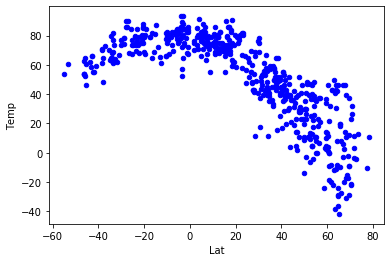

In [56]:
weather_data.plot(kind='scatter', x='Lat', y='Temp', c='blue')

FileNotFoundError: [Errno 2] No such file or directory: '../Images/LatitudeVsTemperature.png'

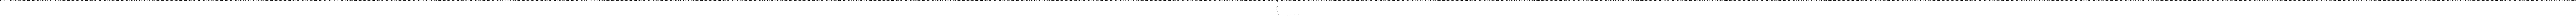

In [57]:
plt.title('lat Vs max temp ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('max temp (F)')
plt.grid()
plt.savefig("../Images/LatitudeVsTemperature.png")

#### Latitude vs. Humidity Plot

#### Latitude vs. Cloudiness Plot

#### Latitude vs. Wind Speed Plot